In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv'
diabetes_df = pd.read_csv(url)


In [46]:
# Display the first 5 rows of the dataset.
diabetes_df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [52]:
# Get the dimensions of the dataset (number of columns and rows).
num_rows, num_columns = diabetes_df.shape
diabetes_df.shape

(101766, 50)

In [51]:
# Display the column names.
column_names = diabetes_df.columns
column_names

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [50]:
# Display basic statistics of the dataset.
summary_stats = diabetes_df.describe()
summary_stats

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [53]:
# Select specific columns of interest.
selected_columns = diabetes_df[['gender', 'age', 'medical_specialty', 'diag_1', 'diabetesMed', 'readmitted']]
selected_columns

,gender,age,medical_specialty,diag_1,diabetesMed,readmitted
0,Female,[0-10),Pediatrics-Endocrinology,250.83,No,NO
1,Female,[10-20),?,276,Yes,>30
2,Female,[20-30),?,648,Yes,NO
3,Male,[30-40),?,8,Yes,NO
4,Male,[40-50),?,197,Yes,NO
...,...,...,...,...,...,...
101761,Male,[70-80),?,250.13,Yes,>30
101762,Female,[80-90),?,560,Yes,NO
101763,Male,[70-80),?,38,Yes,NO
101764,Female,[80-90),Surgery-General,996,Yes,NO


In [55]:
# Count the occurrences of values in the 'age' column.
age_counts = selected_columns['age'].value_counts()
age_counts

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [56]:
# Sort the dataset by the 'diag_1' column.
sorted_diabetes_df = diabetes_df.sort_values('diag_1')
sorted_diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
99611,415513862,152018339,Other,Male,[60-70),?,2,1,1,12,...,No,Down,No,No,No,No,No,Ch,Yes,NO
55425,160287738,52189857,AfricanAmerican,Male,[70-80),?,1,1,7,13,...,No,No,No,No,No,No,No,No,No,NO
66525,185798838,60145218,Asian,Male,[50-60),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
81899,254546094,111103389,Caucasian,Male,[80-90),?,2,3,7,6,...,No,No,No,No,No,No,No,No,No,NO
86984,277122066,69670206,Hispanic,Male,[50-60),?,3,1,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95163,357921158,123973484,Caucasian,Female,[70-80),?,2,3,4,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
18414,66683040,23487408,Caucasian,Female,[70-80),?,5,3,17,4,...,No,Down,No,No,No,No,No,Ch,Yes,>30
63030,175382550,69256188,Caucasian,Male,[80-90),[100-125),2,1,1,5,...,No,Steady,No,No,No,No,No,No,Yes,>30
16366,61551600,25825491,Caucasian,Female,[90-100),?,5,3,17,3,...,No,No,No,No,No,No,No,No,No,NO


In [57]:
# Filter the dataset for a specific age group.
age_group_60_70 = diabetes_df[diabetes_df['age'] == '[60-70)']
age_group_60_70

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
11,36900,77391171,AfricanAmerican,Male,[60-70),?,2,1,4,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
14,62256,49726791,AfricanAmerican,Female,[60-70),?,3,1,2,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
15,73578,86328819,AfricanAmerican,Male,[60-70),?,1,3,7,12,...,No,Up,No,No,No,No,No,Ch,Yes,NO
21,150048,21239181,?,Male,[60-70),?,2,1,4,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101723,443695760,98476776,Caucasian,Male,[60-70),[150-175),3,6,1,3,...,No,No,No,No,No,No,No,No,Yes,>30
101724,443698988,105807996,AfricanAmerican,Male,[60-70),?,6,6,17,7,...,No,No,No,No,No,No,No,No,Yes,NO
101736,443739152,90751788,Caucasian,Female,[60-70),?,1,3,7,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [58]:
# Count the occurrences in the age group 60-70.
count_age_group_60_70 = age_group_60_70.shape[0]
count_age_group_60_70

22483

In [59]:
# Repeated filtering and counting for various age groups.
count_age_group_50_60 = diabetes_df[diabetes_df['age'] == '[50-60)'].shape[0]
count_age_group_40_50 = diabetes_df[diabetes_df['age'] == '[40-50)'].shape[0]
count_age_group_30_40 = diabetes_df[diabetes_df['age'] == '[30-40)'].shape[0]
count_age_group_20_30 = diabetes_df[diabetes_df['age'] == '[20-30)'].shape[0]
count_age_group_10_20 = diabetes_df[diabetes_df['age'] == '[10-20)'].shape[0]
count_age_group_0_10 = diabetes_df[diabetes_df['age'] == '[0-10)'].shape[0]
count_age_group_70_80 = diabetes_df[diabetes_df['age'] == '[70-80)'].shape[0]
count_age_group_80_90 = diabetes_df[diabetes_df['age'] == '[80-90)'].shape[0]
count_age_group_90_100 = diabetes_df[diabetes_df['age'] == '[90-100)'].shape[0]


In [61]:
# Count the number of females in the study.
count_females = diabetes_df[diabetes_df['gender'] == 'Female'].shape[0]
count_females

54708

In [62]:
# Count the number of males in the study.
count_males = diabetes_df[diabetes_df['gender'] == 'Male'].shape[0]
count_males

47055

In [63]:
# Create a pivot table to calculate the mean 'time_in_hospital' by age.
age_time_table = pd.pivot_table(data=diabetes_df, index='age', values='time_in_hospital', aggfunc='mean')
age_time_table

,time_in_hospital
age,
[0-10),2.546584
[10-20),3.191027
[20-30),3.564876
[30-40),3.799735
[40-50),4.039649
[50-60),4.125753
[60-70),4.382244
[70-80),4.590878
[80-90),4.808629


<Axes: xlabel='age'>

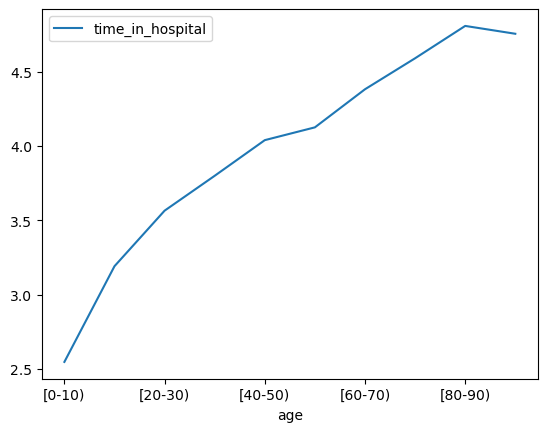

In [64]:
# Plot the pivot table data.
age_time_table.plot()


In [66]:
# Display general statistics of the dataset.
general_stats = diabetes_df.describe(include=['object'])
general_stats 

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [67]:
# Display information about the dataset, including data types and memory usage.
data_info = diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [69]:
# Check for null values in each column.
null_counts = diabetes_df.isnull().sum()
null_counts

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [71]:
# Count the number of unique diagnoses in 'diag_1'.
unique_diag_1_count = diabetes_df['diag_1'].nunique()
unique_diag_1_count

717

In [72]:
# Group and count the diagnoses in 'diag_1', 'diag_2', and 'diag_3'.
diag1_counts = diabetes_df.groupby(['diag_1'])['patient_nbr'].count().sort_values(ascending=False)
diag2_counts = diabetes_df.groupby(['diag_2'])['patient_nbr'].count().sort_values(ascending=False)
diag3_counts = diabetes_df.groupby(['diag_3'])['patient_nbr'].count().sort_values(ascending=False)


In [74]:
# Create a new DataFrame with selected columns.
selected_columns_df = diabetes_df[['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'number_emergency']]
selected_columns_df

,patient_nbr,diag_1,diag_2,diag_3,patient_nbr,race,gender,age,weight,number_emergency
0,8222157,250.83,?,?,8222157,Caucasian,Female,[0-10),?,0
1,55629189,276,250.01,255,55629189,Caucasian,Female,[10-20),?,0
2,86047875,648,250,V27,86047875,AfricanAmerican,Female,[20-30),?,0
3,82442376,8,250.43,403,82442376,Caucasian,Male,[30-40),?,0
4,42519267,197,157,250,42519267,Caucasian,Male,[40-50),?,0
...,...,...,...,...,...,...,...,...,...,...
101761,100162476,250.13,291,458,100162476,AfricanAmerican,Male,[70-80),?,0
101762,74694222,560,276,787,74694222,AfricanAmerican,Female,[80-90),?,0
101763,41088789,38,590,296,41088789,Caucasian,Male,[70-80),?,0
101764,31693671,996,285,998,31693671,Caucasian,Female,[80-90),?,0


In [77]:
# Get unique values in the 'age' and 'weight' columns.
unique_age_values = selected_columns_df['age'].unique().tolist()
unique_age_values

['[0-10)',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

In [78]:
unique_weight_values = selected_columns_df['weight'].unique().tolist()
unique_weight_values 

['?',
 '[75-100)',
 '[50-75)',
 '[0-25)',
 '[100-125)',
 '[25-50)',
 '[125-150)',
 '[175-200)',
 '[150-175)',
 '>200']

In [80]:
# List the columns of the DataFrame.
column_list = selected_columns_df.columns
column_list

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'patient_nbr', 'race',
       'gender', 'age', 'weight', 'number_emergency'],
      dtype='object')

In [81]:
# Get unique values in the 'medical_specialty' column.
unique_medical_specialties = diabetes_df['medical_specialty'].unique()
unique_medical_specialties

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [82]:
# Calculate the count of visits for each medical specialty.
medical_specialty_counts = diabetes_df.groupby(['medical_specialty'])['encounter_id'].count().sort_values(ascending=False)
medical_specialty_counts

medical_specialty
?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Proctology                    1
Psychiatry-Addictive          1
Neurophysiology               1
SportsMedicine                1
Perinatology                  1
Name: encounter_id, Length: 73, dtype: int64

In [83]:
# Get unique values in the 'payer_code' column.
unique_payer_codes = diabetes_df['payer_code'].unique()
unique_payer_codes


array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

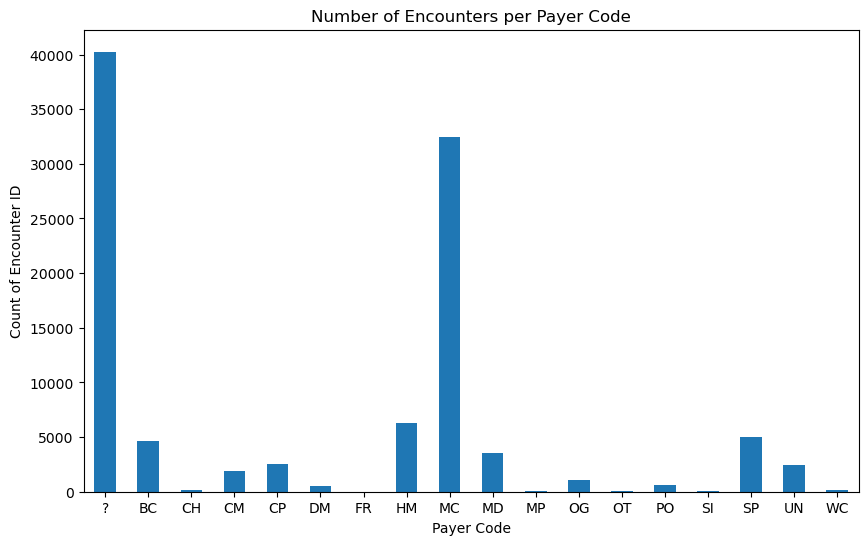

In [84]:
# Calculate the count of encounters for each payer code and visualize the data.
payer_code_counts = diabetes_df.groupby('payer_code')['encounter_id'].count()

plt.figure(figsize=(10, 6))
payer_code_counts.plot(kind='bar')
plt.xlabel('Payer Code')
plt.ylabel('Count of Encounter ID')
plt.title('Number of Encounters per Payer Code')
plt.xticks(rotation=0)
plt.show()

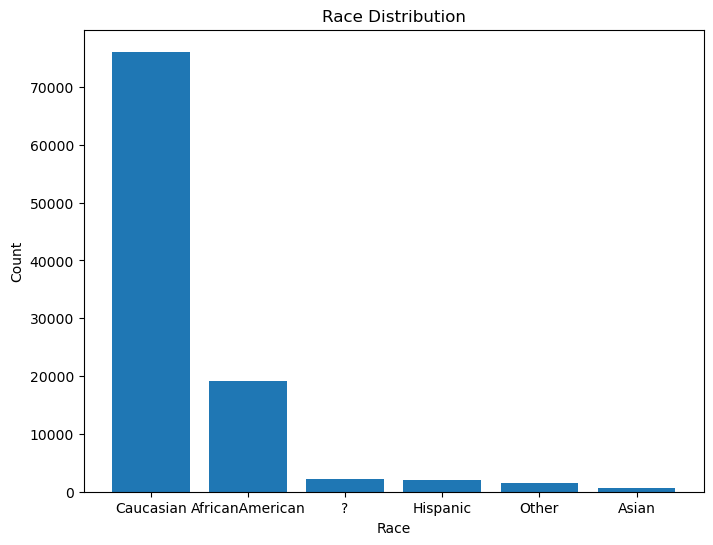

In [85]:
# Visualize the distribution of race.
plt.figure(figsize=(8, 6))
race_counts = diabetes_df['race'].value_counts()
plt.bar(race_counts.index, race_counts.values)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()

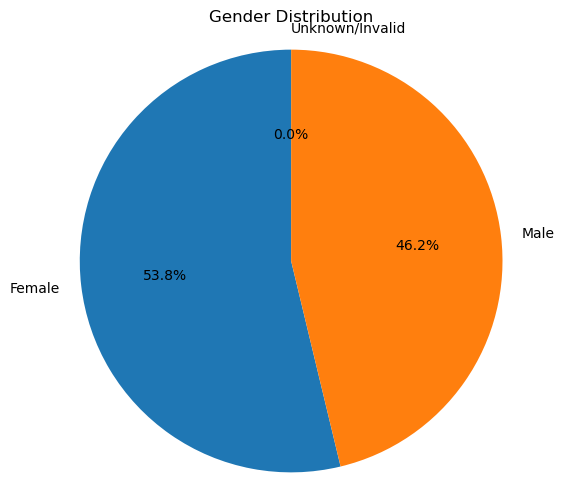

In [86]:
# Visualize the gender distribution using a pie chart.
plt.figure(figsize=(6, 6))
gender_counts = diabetes_df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

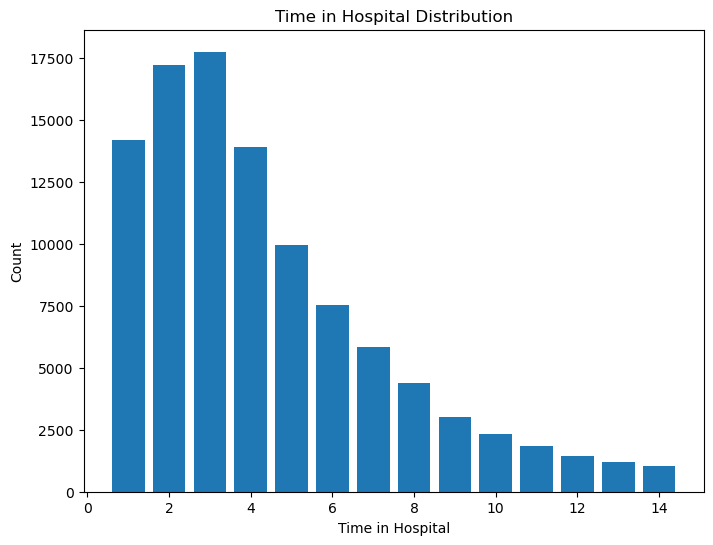

In [87]:
# Visualize the distribution of time spent in the hospital.
plt.figure(figsize=(8, 6))
time_in_hospital_counts = diabetes_df['time_in_hospital'].value_counts().sort_index()
plt.bar(time_in_hospital_counts.index, time_in_hospital_counts.values)
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.title('Time in Hospital Distribution')
plt.show()

The diabetic dataset contains 101,766 rows and 50 columns. In the age category of 90-100, there were 2,793 individuals. For the 80-90 age group, there were 17,197 individuals. In the 70-80 age group, there were 26,068 individuals. In the 60-70 age group, there were 22,483 individuals. For the 50-60 age group, there were 17,256 individuals. In the 40-50 age group, there were 9,685 individuals. In the 30-40 age group, there were 3,775 individuals. In the 20-30 age group, there were 1,657 individuals. In the 10-20 age group, there were 691 individuals. In the 0-10 age group, there were 161 individuals.

There were 54,708 females and 47,055 males in the dataset. The age groups that spent the most time in the hospital were 80-90 years, 90-100 years, and 70-80 years. There were no null values in the columns.

The most common primary diagnosis (1st diagnosis) patients came for was 428, which corresponds to congestive heart failure. The second most common diagnosis (2nd diagnosis) was 276, indicating hyposmolality and/or hyponatremia. The third most common diagnosis (3rd diagnosis) was 250, representing diabetes mellitus. The top medical specialty labeled as number 1 is "unknown" because it had a question mark. The second most common medical specialty is "internal medicine," and the third most common medical specialty is "emergency/trauma."